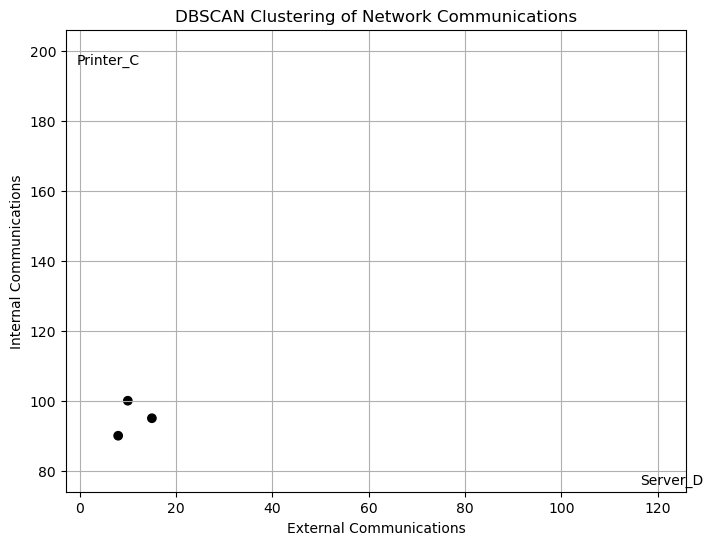

      Device  External_Comm  Internal_Comm  Cluster
0   Laptop_A             10            100        0
1    Phone_B             15             95        0
2  Printer_C              3            200       -1
3   Laptop_B              8             90        0
4   Server_D            120             80       -1


In [13]:
import pandas as pd  # A
from sklearn.cluster import DBSCAN  # B
import matplotlib.pyplot as plt  # C

# Create a sample dataset: Network communication patterns
data = {  # D
    'Device': ['Laptop_A', 'Phone_B', 'Printer_C', 'Laptop_B', 'Server_D'],  # D1
    'External_Comm': [10, 15, 3, 8, 120],  # D2
    'Internal_Comm': [100, 95, 200, 90, 80]  # D3
}

df = pd.DataFrame(data)  # E

# Extract features for clustering
X = df[['External_Comm', 'Internal_Comm']]  # F

# Apply DBSCAN with adjusted parameters
dbscan = DBSCAN(eps=50, min_samples=2)  # G
df['Cluster'] = dbscan.fit_predict(X)  # H

# Plot the clusters
plt.figure(figsize=(8, 6))  # I
scatter = plt.scatter(df['External_Comm'], df['Internal_Comm'], c=df['Cluster'], cmap='Greys', label='Clusters')  # J
plt.title('DBSCAN Clustering of Network Communications')  # K
plt.xlabel('External Communications')  # L
plt.ylabel('Internal Communications')  # M
plt.grid(True)  # N

# Annotate outliers (Cluster -1)
outliers = df[df['Cluster'] == -1]
for i in range(len(outliers)):
    plt.annotate(outliers.iloc[i]['Device'], (outliers.iloc[i]['External_Comm'], outliers.iloc[i]['Internal_Comm']),
                 textcoords="offset points", xytext=(10, -10), ha='center')  # O
plt.show()  # P

# Display the resulting clusters
print(df)  # Q


In [15]:
import numpy as np  # A
import pandas as pd  # B
from sklearn.model_selection import train_test_split  # C
from sklearn.ensemble import RandomForestClassifier  # D
from sklearn.svm import SVC  # E
from sklearn.metrics import accuracy_score, classification_report  # F

# Create a synthetic dataset for login activity (malicious vs. normal)
np.random.seed(42)  # G
n_samples = 100  # H

# Generate features: login hour and failed login attempts
login_hours = np.random.randint(0, 24, n_samples)  # I
failed_attempts = np.random.randint(0, 10, n_samples)  # J

# Generate labels: 1 for malicious activity, 0 for normal activity
labels = np.array([1 if (hour > 20 or attempts > 5) else 0 for hour, attempts in zip(login_hours, failed_attempts)])  # K

# Create a DataFrame for visualization and model training
df = pd.DataFrame({
    'Login_Hour': login_hours,
    'Failed_Attempts': failed_attempts,
    'Label': labels
})  # L

# Split the dataset into training and testing sets
X = df[['Login_Hour', 'Failed_Attempts']]  # M
y = df['Label']  # N
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # O

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)  # P
rf_model.fit(X_train, y_train)  # Q

# Train an SVM model
svm_model = SVC(kernel='linear', random_state=42)  # R
svm_model.fit(X_train, y_train)  # S

# Make predictions
rf_predictions = rf_model.predict(X_test)  # T
svm_predictions = svm_model.predict(X_test)  # U

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_predictions)  # V
svm_accuracy = accuracy_score(y_test, svm_predictions)  # W

# Display results
print("Random Forest Accuracy:", rf_accuracy)  # X
print("SVM Accuracy:", svm_accuracy)  # Y
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))  # Z
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))  # AA


Random Forest Accuracy: 1.0
SVM Accuracy: 0.8666666666666667

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.83      0.94      0.88        16

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



In [ ]:
pip install tensorflow

In [ ]:
pip install --upgrade pip

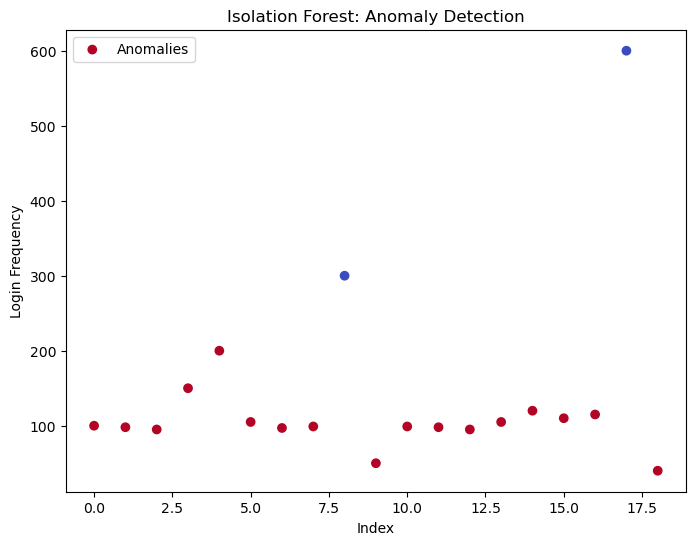

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


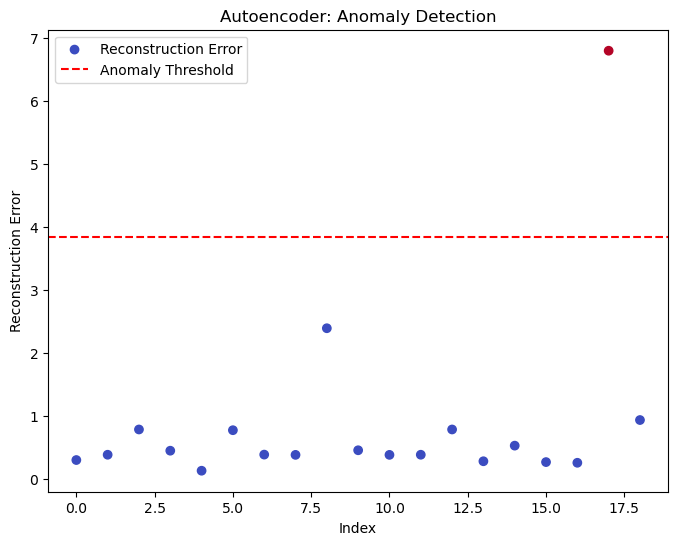

In [7]:
# Import required libraries
import numpy as np  # A
import pandas as pd  # B
from sklearn.ensemble import IsolationForest  # C
from sklearn.preprocessing import StandardScaler  # D
from tensorflow.keras.models import Sequential  # E
from tensorflow.keras.layers import Dense, Input  # F
import matplotlib.pyplot as plt  # G

# Step 1: Create a sample dataset
data = {  # H
    'Login_Frequency': [100, 98, 95, 150, 200, 105, 97, 99, 300, 50, 99, 98, 95, 105, 120, 110, 115, 600, 40],  # H1
    'Access_Levels': [1, 1, 1, 3, 2, 1, 1, 1, 4, 1, 1, 1, 1, 2, 3, 2, 2, 4, 1],  # H2
    'Failed_Logins': [2, 1, 0, 1, 3, 0, 1, 1, 5, 2, 1, 1, 0, 1, 1, 1, 1, 6, 0]  # H3
}

df = pd.DataFrame(data)  # I

# Step 2: Apply Isolation Forest for anomaly detection
scaler = StandardScaler()  # J
scaled_data = scaler.fit_transform(df)  # K

isolation_forest = IsolationForest(contamination=0.1, random_state=42)  # L
df['Anomaly_IF'] = isolation_forest.fit_predict(scaled_data)  # M

# Step 3: Plot the results from Isolation Forest
plt.figure(figsize=(8, 6))  # N
plt.scatter(df.index, df['Login_Frequency'], c=df['Anomaly_IF'], cmap='coolwarm', label='Anomalies')  # O
plt.title('Isolation Forest: Anomaly Detection')  # P
plt.xlabel('Index')  # Q
plt.ylabel('Login Frequency')  # R
plt.legend()  # S
plt.show()  # T

# Step 4: Apply Autoencoder
input_dim = scaled_data.shape[1]  # U

autoencoder = Sequential([  # V
    Input(shape=(input_dim,)),  # V1
    Dense(10, activation='relu'),  # V2
    Dense(5, activation='relu'),  # V3
    Dense(2, activation='relu'),  # V4
    Dense(5, activation='relu'),  # V5
    Dense(10, activation='relu'),  # V6
    Dense(input_dim, activation='sigmoid')  # V7
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')  # W
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=16, verbose=0)  # X

# Step 5: Evaluate reconstruction error
reconstructed = autoencoder.predict(scaled_data)  # Y
reconstruction_error = np.mean((scaled_data - reconstructed) ** 2, axis=1)  # Z

threshold = reconstruction_error.mean() + 2 * reconstruction_error.std()  # AA
df['Anomaly_AE'] = reconstruction_error > threshold  # AB

# Step 6: Plot the results from Autoencoder
plt.figure(figsize=(8, 6))  # AC
plt.scatter(df.index, reconstruction_error, c=df['Anomaly_AE'], cmap='coolwarm', label='Reconstruction Error')  # AD
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')  # AE
plt.title('Autoencoder: Anomaly Detection')  # AF
plt.xlabel('Index')  # AG
plt.ylabel('Reconstruction Error')  # AH
plt.legend()  # AI
plt.show()  # AJ


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



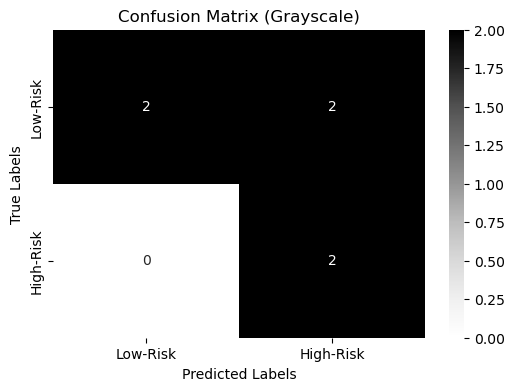

In [11]:
import pandas as pd  # A
from sklearn.feature_extraction.text import TfidfVectorizer  # B
from sklearn.model_selection import train_test_split  # C
from sklearn.linear_model import LogisticRegression  # D
from sklearn.metrics import classification_report, confusion_matrix  # E
import seaborn as sns  # F
import matplotlib.pyplot as plt  # G

# Step 1: Generate a balanced dataset
data = {  # H
    'Article': [
        "Ransomware targets financial institutions",  # H1
        "Security patch released for major software vulnerability",  # H2
        "Hackers steal millions of customer data in breach",  # H3
        "Low-risk malware detected in corporate emails",  # H4
        "Phishing campaign aims to steal credentials",  # H5
        "Database vulnerability in hospital systems",  # H6
        "Encryption policies updated to prevent breaches",  # H7
        "Zero-day vulnerability in common software",  # H8
        "Mandatory security training after an attack",  # H9
        "Phishing attacks target large organizations"  # H10
    ] * 2,  # Duplicate entries to balance classes
    'Label': ['high-risk', 'low-risk', 'high-risk', 'low-risk', 'high-risk',
              'low-risk', 'low-risk', 'high-risk', 'low-risk', 'high-risk'] * 2  # Balanced labels
}

df = pd.DataFrame(data)  # I

# Step 2: Convert labels to numeric
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'high-risk' else 0)  # J

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Article'], df['Label'], test_size=0.3, random_state=42)  # K

# Step 4: Apply TF-IDF and Logistic Regression in a pipeline
vectorizer = TfidfVectorizer(stop_words='english')  # L
X_train_tfidf = vectorizer.fit_transform(X_train)  # M
X_test_tfidf = vectorizer.transform(X_test)  # N
model = LogisticRegression()  # O
model.fit(X_train_tfidf, y_train)  # P

# Step 5: Make predictions
y_pred = model.predict(X_test_tfidf)  # Q

# Step 6: Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))  # R
conf_matrix = confusion_matrix(y_test, y_pred)  # S

# Step 7: Plot the confusion matrix (Grayscale)
plt.figure(figsize=(6, 4))  # T
sns.heatmap(conf_matrix, annot=True, cmap='Greys', fmt='d',  # U
            xticklabels=['Low-Risk', 'High-Risk'], yticklabels=['Low-Risk', 'High-Risk'])
plt.title('Confusion Matrix (Grayscale)')  # V
plt.xlabel('Predicted Labels')  # W
plt.ylabel('True Labels')  # X
plt.show()  # Y


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       126
           1       1.00      0.00      0.00        74

    accuracy                           0.63       200
   macro avg       0.81      0.50      0.39       200
weighted avg       0.77      0.63      0.49       200



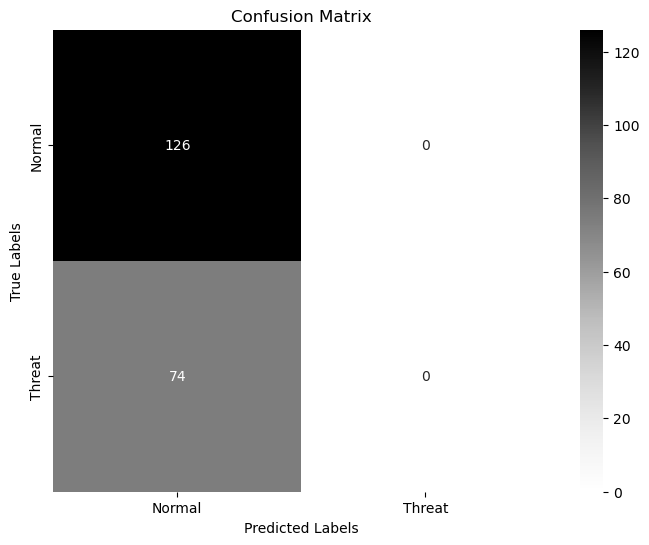

In [17]:
import pandas as pd  # A
import numpy as np  # B
import tensorflow as tf  # C
from tensorflow.keras.layers import Input, Dense  # D
from tensorflow.keras.models import Sequential  # E
from sklearn.model_selection import train_test_split  # F
from sklearn.preprocessing import StandardScaler  # G
from sklearn.metrics import classification_report, confusion_matrix  # H
import matplotlib.pyplot as plt  # I
import seaborn as sns  # J

# Step 1: Generate synthetic network traffic data
np.random.seed(42)  # K
data = {
    'Packet_Size': np.random.randint(50, 1500, size=1000),  # L1
    'Connection_Duration': np.random.uniform(0.1, 10.0, size=1000),  # L2
    'Protocol_Type': np.random.choice([0, 1, 2], size=1000),  # L3
    'Threat': np.random.choice([0, 1], size=1000, p=[0.7, 0.3])  # L4
}
df = pd.DataFrame(data)  # M

# Step 2: Split data into features and labels
X = df.drop(columns=['Threat'])  # N
y = df['Threat']  # O

# Step 3: Preprocess the data
scaler = StandardScaler()  # P
X_scaled = scaler.fit_transform(X)  # Q
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # R

# Step 4: Define the neural network with explicit Input layer
model = Sequential([  # S
    Input(shape=(X_train.shape[1],)),  # S1
    Dense(64, activation='relu'),  # S2
    Dense(32, activation='relu'),  # S3
    Dense(1, activation='sigmoid')  # S4
])

# Step 5: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # T

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)  # U

# Step 7: Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)  # V
print(classification_report(y_test, y_pred, zero_division=1))  # W

# Step 8: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  # X
plt.figure(figsize=(8, 6))  # Y
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', xticklabels=['Normal', 'Threat'], yticklabels=['Normal', 'Threat'])  # Z
plt.title('Confusion Matrix')  # AA
plt.xlabel('Predicted Labels')  # AB
plt.ylabel('True Labels')  # AC
plt.show()  # AD


In [19]:
import numpy as np    #A

# Define states and actions
states = ['normal', 'suspicious', 'attack']    #B
actions = ['quarantine', 'block_traffic', 'escalate']    #C

# Initialize the Q-table
Q_table = np.zeros((len(states), len(actions)))    #D

# Define the rewards for each action in each state
rewards = {    #E
    ('normal', 'quarantine'): -10,
    ('normal', 'block_traffic'): -5,
    ('normal', 'escalate'): -1,
    ('suspicious', 'quarantine'): 5,
    ('suspicious', 'block_traffic'): 10,
    ('suspicious', 'escalate'): 1,
    ('attack', 'quarantine'): 20,
    ('attack', 'block_traffic'): 30,
    ('attack', 'escalate'): 15,
}

# Parameters for Q-learning
alpha = 0.1  # Learning rate    #F
gamma = 0.9  # Discount factor    #G
epsilon = 0.1  # Exploration rate    #H

# Simulate the learning process
for episode in range(1000):    #I
    state = np.random.choice(states)    #J
    
    # Choose an action (explore or exploit)
    if np.random.uniform(0, 1) < epsilon:    #K
        action = np.random.choice(actions)    #L
    else:
        action = actions[np.argmax(Q_table[states.index(state)])]    #M
    
    # Get the reward and update Q-values
    reward = rewards[(state, action)]    #N
    new_state = np.random.choice(states)  # Randomly simulate a new state    #O
    Q_table[states.index(state), actions.index(action)] += alpha * (reward + gamma * np.max(Q_table[states.index(new_state)]) - Q_table[states.index(state), actions.index(action)])    #P

# Print the learned Q-table
print("Learned Q-table:")    #Q
print(Q_table)    #R


Learned Q-table:
[[32.73471745 39.91411043 66.72556442]
 [76.03230251 46.72274783 46.59997209]
 [89.68917865 42.4702152  46.47549528]]
